# Q2 - Linear Regression

In [347]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

## a

In [348]:
df = pd.read_csv('parkinsons_updrs_data.csv')

In [349]:
df.head()
df.columns

,subject.ID,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter.Per,Jitter.Abs,Jitter.RAP,Jitter.PPQ5,...,Shimmer.dB,Shimmer.APQ3,Shimmer.APQ5,Shimmer.APQ11,Shimmer.DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Index(['subject.ID', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter.Per', 'Jitter.Abs', 'Jitter.RAP', 'Jitter.PPQ5', 'Jitter.DDP',
       'Shimmer', 'Shimmer.dB', 'Shimmer.APQ3', 'Shimmer.APQ5',
       'Shimmer.APQ11', 'Shimmer.DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

## b

**NOTES TO MYSELF**

The data contains data for 42 patients (subjects). For these <br/>
42 patients we have 5,875 voice recordings. 

**general data:**<br/>
subject.ID - Integer that uniquely identifies each subject<br/>
age - Subject age<br/>
sex - Subject gender '0' - male, '1' - female<br/>
test_time - Time since recruitment into the trial. The integer part is the <br/>
number of days since recruitment.<br/>

**what we want to predict:**<br/>
motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated<br/>
total_UPDRS - Clinician's total UPDRS score, linearly interpolated<br/>

**measuremets (16 biomedical voice measures):**<br/>
Jitter.Per,Jitter.Abs,Jitter.RAP,Jitter.PPQ5,Jitter.DDP - Several measures of <br/>
variation in fundamental frequency<br/>
Shimmer,Shimmer.dB,Shimmer.APQ3,Shimmer.APQ5,Shimmer.APQ11,Shimmer.DDA - <br/>
Several measures of variation in amplitude<br/>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice<br/>
RPDE - A nonlinear dynamical complexity measure<br/>
DFA - Signal fractal scaling exponent<br/>
PPE - A nonlinear measure of fundamental frequency variation <br/>

In [350]:
df.describe()

,subject.ID,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter.Per,Jitter.Abs,Jitter.RAP,Jitter.PPQ5,...,Shimmer.dB,Shimmer.APQ3,Shimmer.APQ5,Shimmer.APQ11,Shimmer.DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


**age of subjects** - the mean age of the subjects is 64.8 years old, with a standard deviation of 8.8 years. The youngest subject is 36 years old while the oldest is 85.  

**gender of subjects** - since 0 represents a male and 1 - a female, we can see by the "mean sex", that about 32% of the subjects are females, meaning the majuraty (68%) are males. 

## c

In [351]:
df_6 = df[['age','sex','Jitter.Per','Shimmer','NHR','PPE','motor_UPDRS']]

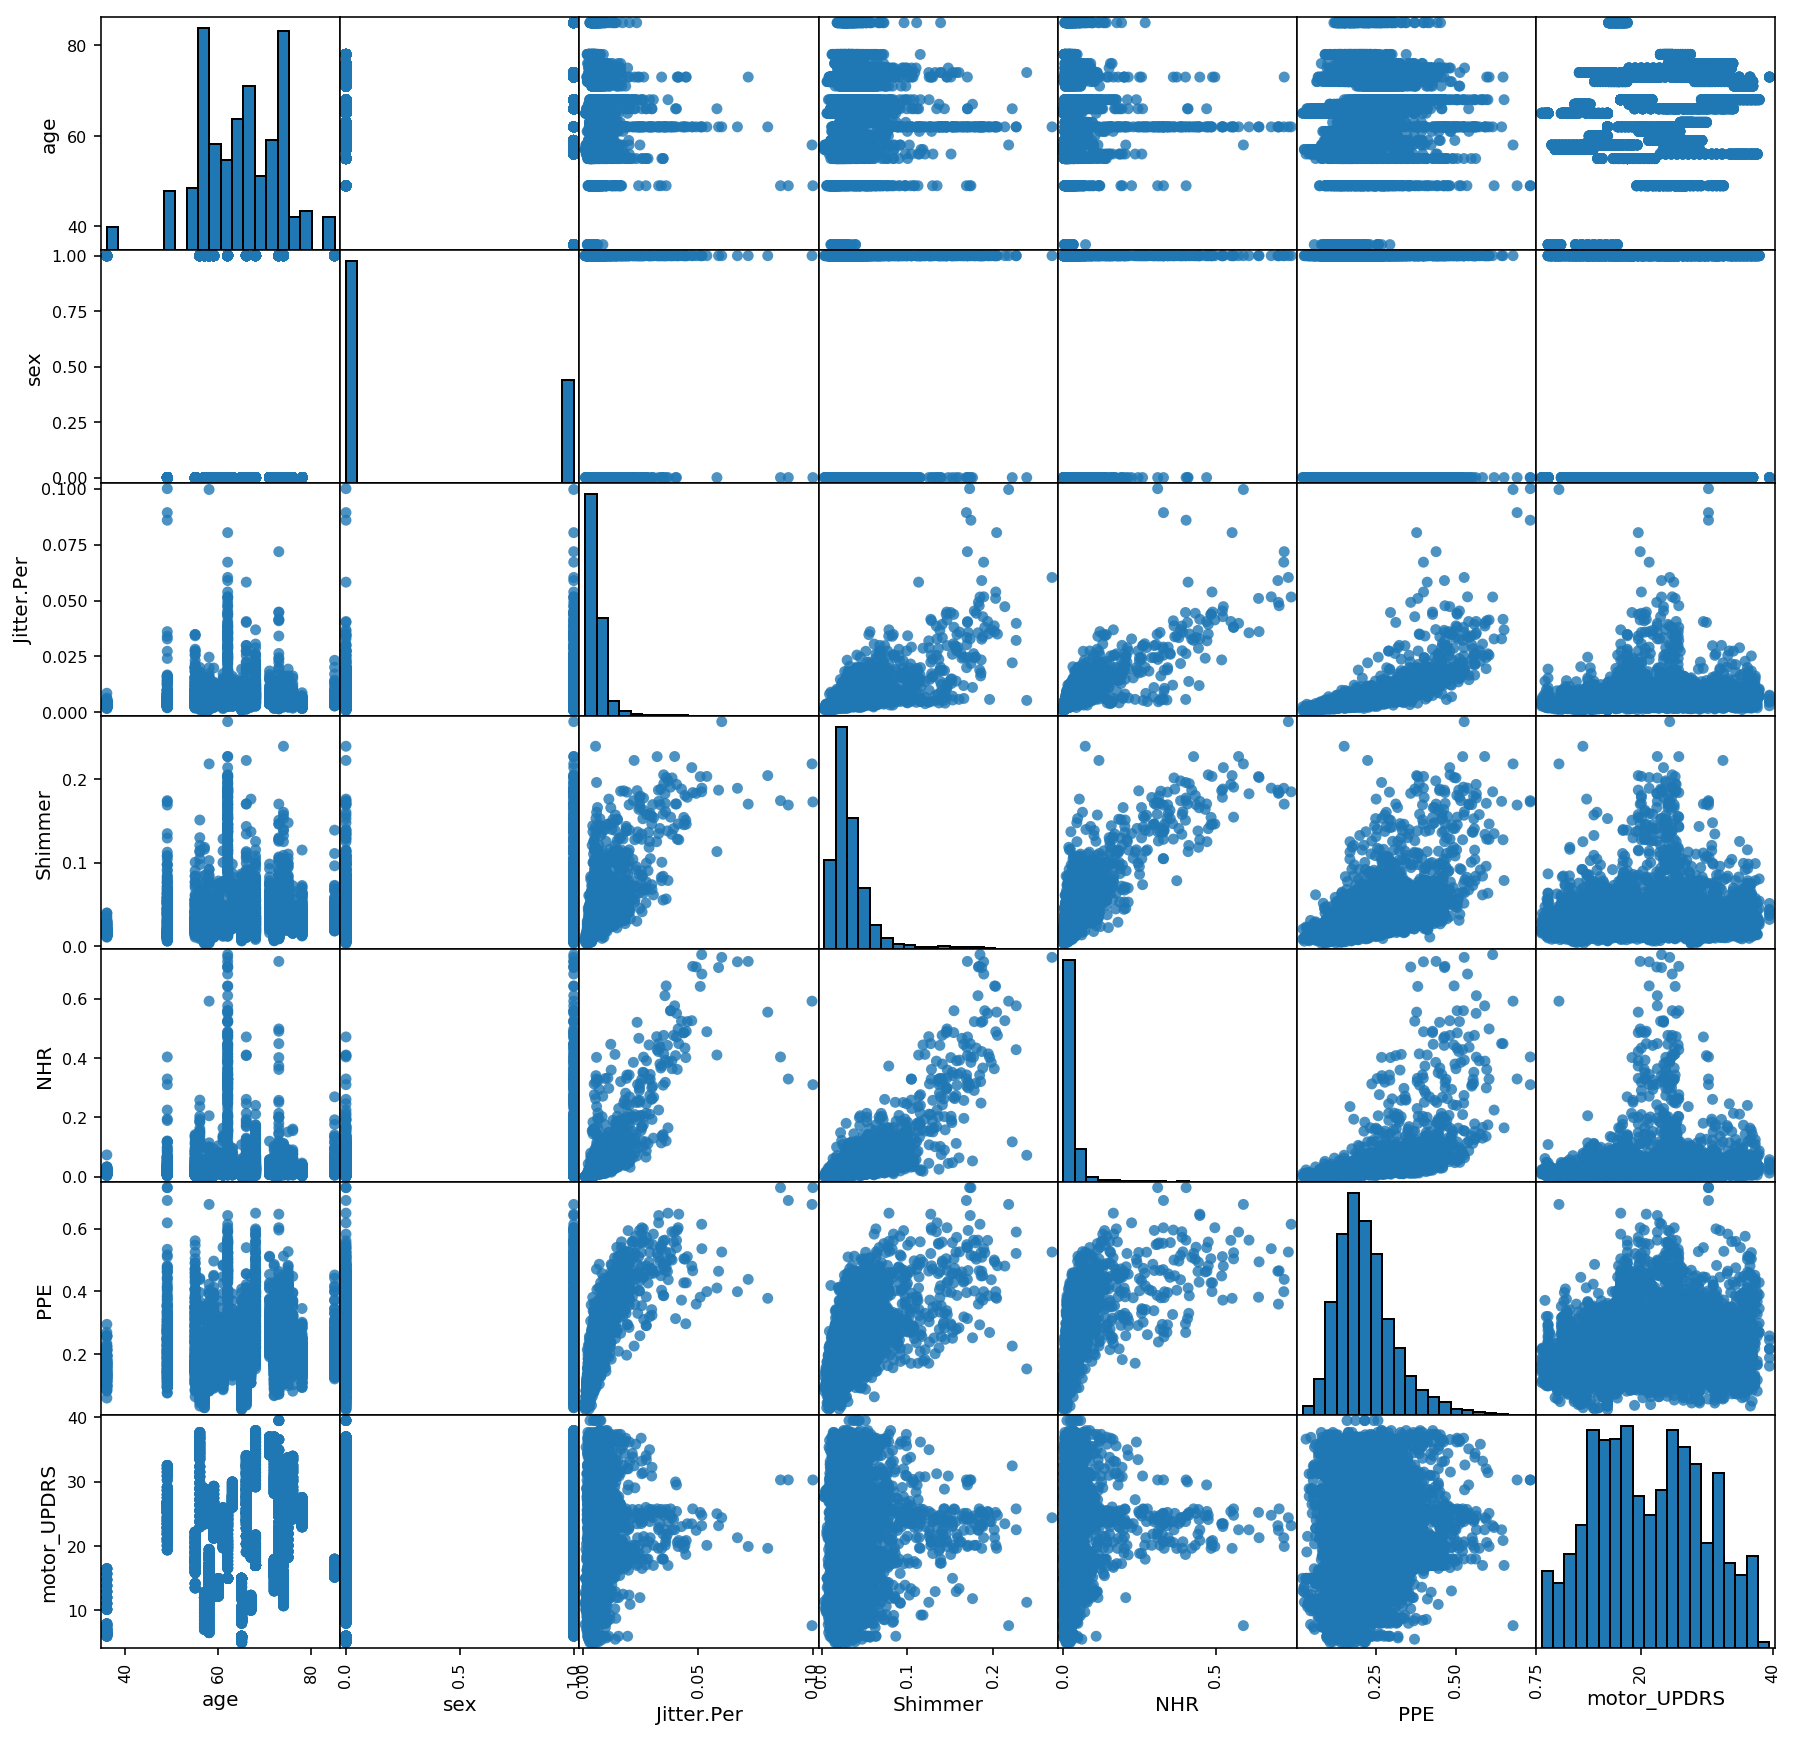

In [352]:
scatter_plot = pd.plotting.scatter_matrix(df_6, alpha=0.8,s=30,figsize=(15,15),
                                          ax=None, grid=True, diagonal='hist',
                                          marker='o', density_kwds=None, 
                                          hist_kwds={'bins':20,'edgecolor':'black'},
                                          range_padding=0.05)


## d

In [353]:
def leastSquares(X,y): #X and y are numpy arrays 
    
    estimators = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),
                                     np.transpose(X)),y)
    
    return estimators

## e

In [354]:
import numpy as np
import statsmodels.api as sm

X = df_6[['age','sex','Jitter.Per','Shimmer','NHR','PPE']].values
y = df_6['motor_UPDRS'].values
X2 = sm.add_constant(X)
# np.shape(X)
# np.shape(y)

w = leastSquares(X2,y)

## f

In [355]:
# python's linear regression (sklearn)
# from sklearn import linear_model
# import statsmodels.api as sm
# X2 = sm.add_constant(X)
# reg = linear_model.LinearRegression()
# reg2 = reg.fit(X2, y)                                      
# print(reg2.coef_)

# python's linear regression (statsmodels)
import statsmodels.api as sm

X2 = sm.add_constant(X)
reg = sm.OLS(y, X2)
reg2 = reg.fit()

Yes, I got the same values. <br/>
The following table summarizes the results.

In [356]:
data = {'My_model': w,
        'Python_model': reg2.params}
table = pd.DataFrame(data)

# The following table compares both models' estimators
print(table)

     My_model  Python_model
0    3.445982      3.445982
1    0.236592      0.236592
2   -0.160868     -0.160868
3 -101.125995   -101.125995
4   -4.648934     -4.648934
5    7.366135      7.366135
6   14.176249     14.176249


## g

We can use a t-test, provided by the the linear regression model from statsmodels:

In [357]:
# sig_level = 0.01
sig_level = 0.01
for i in range(len(reg2.pvalues)-1):
    if (reg2.pvalues[i+1]<sig_level):
        print("Rejecting the null hypothesis with 0.01 significance level of 0.01 for parameter: " 
              + df_6.columns[i])

# sig_level = 0.001
sig_level = 0.001
for i in range(len(reg2.pvalues)-1):
    if (reg2.pvalues[i+1]<sig_level):
        print("Rejecting the null hypothesis with 0.01 significance level of 0.001 for parameter: " 
              + df_6.columns[i])
               
# reg2.summary()
# reg2.params

Rejecting the null hypothesis with 0.01 significance level of 0.01 for parameter: age
Rejecting the null hypothesis with 0.01 significance level of 0.01 for parameter: Jitter.Per
Rejecting the null hypothesis with 0.01 significance level of 0.01 for parameter: PPE
Rejecting the null hypothesis with 0.01 significance level of 0.001 for parameter: age
Rejecting the null hypothesis with 0.01 significance level of 0.001 for parameter: PPE


# Q3 - Logistic Regression

## a

In [1]:
from IPython.display import Math
Math(r'l(w) = argmax_w \sum_{i=1}^{m} log(P(y_i|x_i)) = ' +
     'argmax_w \sum_{i=1}^{m} log(\frac{1}{1+exp(-y_i w^T x_i) })')

<IPython.core.display.Math object>

## b

In [359]:
Math(r'argmax_w \sum_{i=1}^{m} log(\frac{1}{1+exp(-y_i w^T x_i) }) = ' +
     'argmax_w \sum_{i=1}^{m} log(1) - log(1+exp(-y_i w^T x_i)) = ' +
     'argmin_w \sum_{i=1}^{m} log(1+exp(-y_i w^T x_i))')  

<IPython.core.display.Math object>

# Q4 - Multiple Logistic Regression

## a

In [360]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


## b

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

## c

In [362]:
# change data
from copy import copy, deepcopy

# 1
y1 = deepcopy(y_train)

# 1
y1[y1 == 1] = -1# turn vers(1) ad virg(2) to -1
y1[y1 == 2] = -1
y1[y1 == 0] = 1 #turn setosa (0) to 1

# train a logistic regression classfier
from sklearn.linear_model import LogisticRegression
clf_1 = LogisticRegression(fit_intercept = True).fit(X_train, y1)
#instead of adding a constat to X use fit_intercept

## d

In [363]:
# 2
y2 = deepcopy(y_train)

y2[y2 == 0] = -1
y2[y2 == 2] = -1
# y2[y2 == 1] = 1 

# train a logistic regression classfier
from sklearn.linear_model import LogisticRegression
clf_2 = LogisticRegression(fit_intercept = True).fit(X_train, y2)

In [364]:
# 3 
y3 = deepcopy(y_train)

y3[y3 == 0] = -1
y3[y3 == 1] = -1
y3[y3 == 2] = 1

# train a logistic regression classfier
from sklearn.linear_model import LogisticRegression
clf_3 = LogisticRegression(fit_intercept = True).fit(X_train, y3)

## e

In [365]:

def one_versus_rest(clf_1,clf_2,clf_3,X):
    # the order of the classes classified we can get from clf_1.classes_
    pr_1 = clf_1.predict_proba(X) 
    pr_2 = clf_2.predict_proba(X)
    pr_3 = clf_3.predict_proba(X)
    max_prob = np.array([pr_1[:,1],pr_2[:,1],pr_3[:,1]])
    y_predicted = np.argmax(max_prob,axis=0)
    return y_predicted
    

## f

In [366]:
from sklearn.metrics import confusion_matrix

y_pred = one_versus_rest(clf_1,clf_2,clf_3,X_test)
y_true = deepcopy(y_test)

print(confusion_matrix(y_true, y_pred))

[[11  0  0]
 [ 0 12  4]
 [ 0  0 18]]


## g

In [367]:
# create a data frame from the test data 
data = {iris.feature_names[0]: X_test[:,0],
        iris.feature_names[1]: X_test[:,1],
        iris.feature_names[2]:X_test[:,2],
        iris.feature_names[3]:X_test[:,3],
        'y_true':y_true,
        'y_pred':y_pred}
df = pd.DataFrame(data)


df.head(10)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),y_pred,y_true
0,4.2,1.2,5.7,3.0,1,1
1,1.5,0.1,4.9,3.1,0,0
2,4.9,1.8,6.1,3.0,2,2
3,5.7,2.3,6.9,3.2,2,2
4,1.9,0.2,4.8,3.4,0,0
5,1.4,0.2,5.2,3.4,0,0
6,4.5,1.5,5.4,3.0,2,1
7,4.5,1.5,6.2,2.2,1,1
8,1.3,0.2,4.4,3.0,0,0
9,4.9,1.8,6.3,2.7,2,2


we can see that all mistakes are betweenn class 1 and class 2 <br/>
(plot all to see all). if we look at the means of the properties we <br/>
can see that class 1 and 2 are indeed the most similar.

In [368]:
df.groupby('y_true').mean()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),y_pred
y_true,,,,,
0,1.545455,0.245455,5.018182,3.436364,0.00
1,4.143750,1.287500,5.756250,2.743750,1.25
2,5.377778,2.022222,6.450000,2.938889,2.00


Lets plot for example the scatter of sepal width VS. sepal lenngth:

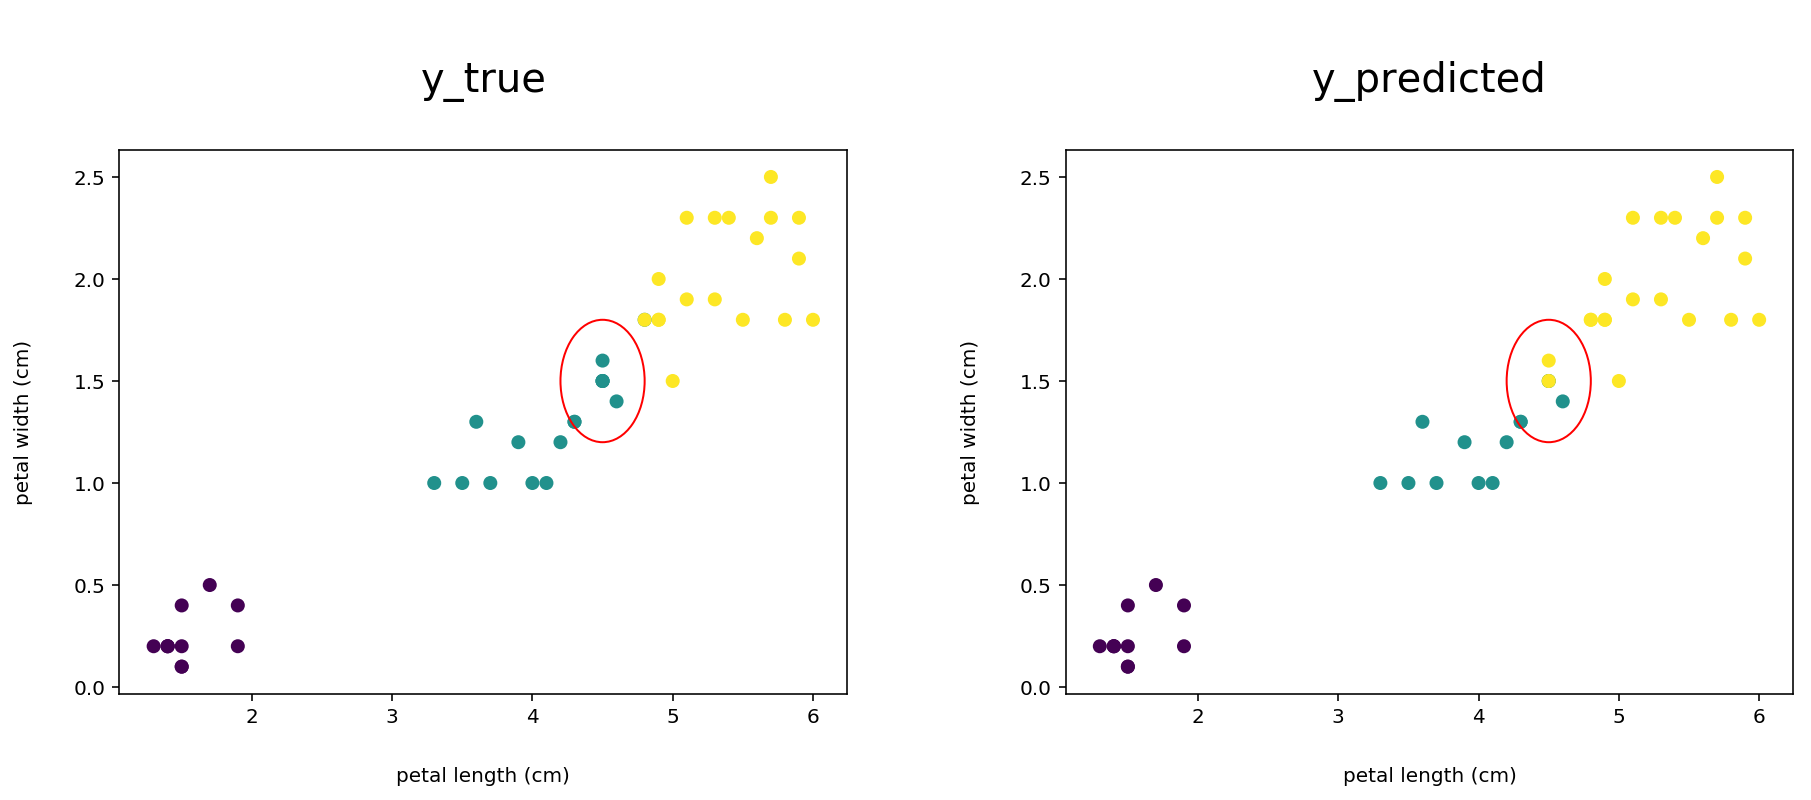

In [369]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.1, wspace=0.3)

ax = fig.add_subplot(1, 2, 1)
plt.scatter(df[iris.feature_names[2]], df[iris.feature_names[3]], c=df['y_true'])
plt.title('\ny_true\n',fontsize=20)
plt.ylabel(iris.feature_names[3],labelpad=20)
plt.xlabel(iris.feature_names[2],labelpad=20)
circle = plt.Circle((4.5, 1.5), 0.3, color='r', fill=False)
ax.add_artist(circle)

ax = fig.add_subplot(1, 2, 2)
plt.scatter(df[iris.feature_names[2]], df[iris.feature_names[3]], c=df['y_pred'])
plt.title('\ny_predicted\n',fontsize=20)
plt.ylabel(iris.feature_names[3],labelpad=20)
plt.xlabel(iris.feature_names[2],labelpad=20)

circle = plt.Circle((4.5, 1.5), 0.3, color='r', fill=False)
ax.add_artist(circle)

plt.show();

we can see that group 0 (purple) is far from the other two groups - 1 and 2. <br/>
and group 1 and 2 have a "common area" of similar length and width